In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import ELU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 100 # iterations over dataset

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
inputs = Input(shape=(32, 32, 3))
num_filters = 20
t = Conv2D(kernel_size=3,strides=1,filters=num_filters,padding="same")(inputs)
t = ELU()(t)

t = Conv2D(kernel_size = (3,3),strides=1,filters = 20, padding = "same")(t)
t = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(t)
y = ELU()(t)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 20, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,t])
z1 = ELU()(y)
z1 = BatchNormalization()(z1)

z1 = Conv2D(kernel_size = (3,3),strides=1,filters = 25, padding = "same")(z1)
z1 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z1)
y = ELU()(z1)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 25, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z1])
z2 = ELU()(y)
z2 = BatchNormalization()(z2)

z2 = Conv2D(kernel_size = (3,3),strides=1,filters = 30, padding = "same")(z2)
z2 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z2)
y = ELU()(z2)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 30, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z2])
z3 = ELU()(y)
z3 = BatchNormalization()(z3)

z3 = Conv2D(kernel_size = (3,3),strides=1,filters = 35, padding = "same")(z3)
z3 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z3)
y = ELU()(z3)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 35, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z3])
z4 = ELU()(y)
z4 = BatchNormalization()(z4)

z4 = Conv2D(kernel_size = (3,3),strides=1,filters = 40, padding = "same")(z4)
z4 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z4)
y = ELU()(z4)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 40, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z4])
z5 = ELU()(y)
z5 = BatchNormalization()(z5)

z5 = Conv2D(kernel_size = (3,3),strides=1,filters = 45, padding = "same")(z5)
z5 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z5)
y = ELU()(z5)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 45, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z5])
z6 = ELU()(y)
z6 = BatchNormalization()(z6)

z6 = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(z6)
z6 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z6)
y = ELU()(z6)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z6])
z7 = ELU()(y)
z7 = BatchNormalization()(z7)

z7 = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(z7)
z7 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z7)
y = ELU()(z7)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z7])
z8 = ELU()(y)
z8 = BatchNormalization()(z8)

t = AveragePooling2D(4)(z8)
t = Flatten()(t)

outputs = Dense(100, activation='softmax')(t)




In [ ]:
model = Model(inputs, outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 20)   560         input_1[0][0]                    
__________________________________________________________________________________________________
elu (ELU)                       (None, 32, 32, 20)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 20)   3620        elu[0][0]                        
_______________________________________________________________________________________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate = 0.001, clipvalue = 0.7),
              metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# save model after each epoch
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint("ResNet_BN_Adam.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)
#hist=model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test),callbacks=[early])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=50, validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
391/390 [==============================] - ETA: 0s - loss: 3.6474 - accuracy: 0.1620
Epoch 00001: val_accuracy improved from -inf to 0.16760, saving model to ResNet_BN_Adam.hdf5
391/390 [==============================] - 42s 108ms/step - loss: 3.6474 - accuracy: 0.1620 - val_loss: 3.8092 - val_accuracy: 0.1676
Epoch 2/50
391/390 [==============================] - ETA: 0s - loss: 3.0277 - accuracy: 0.2610
Epoch 00002: val_accuracy improved from 0.16760 to 0.25630, saving model to ResNet_BN_Adam.hdf5
391/390 [==============================] - 42s 107ms/step - loss: 3.0277 - accuracy: 0.2610 - val_loss: 3.2694 - val_accuracy: 0.2563
Epoch 3/50
391/390 [==============================] - ETA: 0s - loss: 2.7609 - accuracy: 0.3114
Epoch 00003: val_accuracy improved from 0.25630 to 0.27460, saving model to ResNet_BN_Adam.hdf5
391/390 [==============================] - 43s 110ms/step - loss: 2.7609 - accuracy

In [ ]:
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
print(classification_report(y_true,y_pred))
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       100
           1       0.62      0.68      0.65       100
           2       0.47      0.37      0.42       100
           3       0.36      0.16      0.22       100
           4       0.37      0.21      0.27       100
           5       0.56      0.42      0.48       100
           6       0.47      0.65      0.55       100
           7       0.51      0.54      0.52       100
           8       0.50      0.69      0.58       100
           9       0.64      0.69      0.67       100
          10       0.43      0.31      0.36       100
          11       0.51      0.31      0.39       100
          12       0.56      0.61      0.58       100
          13       0.42      0.44      0.43       100
          14       0.28      0.58      0.38       100
          15       0.46      0.39      0.42       100
          16       0.55      0.56      0.55       100
          17       0.74    

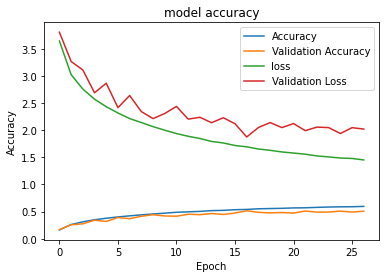

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import ELU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(32, 32, 3))
num_filters = 20
t = Conv2D(kernel_size=3,strides=1,filters=num_filters,padding="same")(inputs)
t = ELU()(t)

t = Conv2D(kernel_size = (3,3),strides=1,filters = 20, padding = "same")(t)
t = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(t)
y = ELU()(t)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 20, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,t])
z1 = ELU()(y)
z1 = BatchNormalization()(z1)

z1 = Conv2D(kernel_size = (3,3),strides=1,filters = 25, padding = "same")(z1)
z1 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z1)
y = ELU()(z1)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 25, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z1])
z2 = ELU()(y)
z2 = BatchNormalization()(z2)

z2 = Conv2D(kernel_size = (3,3),strides=1,filters = 30, padding = "same")(z2)
z2 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z2)
y = ELU()(z2)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 30, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z2])
z3 = ELU()(y)
z3 = BatchNormalization()(z3)

z3 = Conv2D(kernel_size = (3,3),strides=1,filters = 35, padding = "same")(z3)
z3 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z3)
y = ELU()(z3)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 35, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z3])
z4 = ELU()(y)
z4 = BatchNormalization()(z4)

z4 = Conv2D(kernel_size = (3,3),strides=1,filters = 40, padding = "same")(z4)
z4 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z4)
y = ELU()(z4)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 40, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z4])
z5 = ELU()(y)
z5 = BatchNormalization()(z5)

z5 = Conv2D(kernel_size = (3,3),strides=1,filters = 45, padding = "same")(z5)
z5 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z5)
y = ELU()(z5)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 45, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z5])
z6 = ELU()(y)
z6 = BatchNormalization()(z6)

z6 = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(z6)
z6 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z6)
y = ELU()(z6)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z6])
z7 = ELU()(y)
z7 = BatchNormalization()(z7)

z7 = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(z7)
z7 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(z7)
y = ELU()(z7)
y = BatchNormalization()(y)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 50, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Add()([y,z7])
z8 = ELU()(y)
z8 = BatchNormalization()(z8)

t = AveragePooling2D(4)(z8)
t = Flatten()(t)

outputs = Dense(100, activation='softmax')(t)

model = Model(inputs, outputs)

model.load_weights('../weights/ResNet_Adam_With_BatchNormalization.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))


